#### 2-dimentional animation of fields

This code produce an animation of one component in fdtd-solver as a heatmap.

All data is placed in "2D_anim._values.txt" had been created after run of 2Dimention_solution_TEz.cpp. So, first cell is properly parse whole data, second one is just showing it,frame (at time) by frame.

I added the appropriate colorbar, you can read the explanation at this link: https://joseph-long.com/writing/colorbars/, I also added saving option. Now, if you want to save it as a .gif file just delete '#' symol in corresponding line.

In [5]:
#########/ data initializing /#################################################
Field = []
with open("2D_anim._values.txt", 'r') as f:
    TIME = (int)(f.readline())
    SIZE = f.readline().split(' ')
    SIZE_X = (int)(SIZE[0])
    SIZE_Y = (int)(SIZE[1])
    for t in range(int(TIME/5)):
        temp = f.readline() 
        temp = temp.split('\t')[:-1]
        Field_X = []
        for X in range(len(temp)) : # [0.01, 0.02, 0.03]
            Field_X.append(list(map(float, temp[X].split(' ')[:-1])))
        Field.append(Field_X)

In [ ]:
######### / animation /########################################################
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib notebook


fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111, xlim=(-1, SIZE_X),  ylim=(-1, SIZE_Y))

def redraw(i):
    Field_.set_data(Field[i]) 
    return Field_ 

Field_ = ax.imshow(Field[0],
                cmap = plt.get_cmap('plasma'),
                interpolation="gaussian",
                animated=True,
                origin='lower',
                extent=(0,SIZE_X-1,0,SIZE_Y-1),
                #vmin=-0.127, vmax=0.127,
                )

#corner_bound = ax.plot([SIZE_X/2, SIZE_X/2, SIZE_X-1], [1, SIZE_Y/2, SIZE_Y/2], color = 'r')

fig.colorbar(Field_,
             cax=make_axes_locatable(ax).append_axes("right", 
                                                     size="4%", 
                                                     pad=0.05)
             # second & suitable solution
             )

anim = animation.FuncAnimation(fig,
                               redraw,
                               frames=TIME,
                               interval=10,
                               blit=True,
                               )

#anim.save("Ex(r, t).gif", writer="imagemagick", fps = 30)

plt.show()

<IPython.core.display.Javascript object>

d:\python\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  # Remove the CWD from sys.path while we load stuff.
d:\python\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  # This is added back by InteractiveShellApp.init_path()
d:\python\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  if sys.path[0] == '':
d:\python\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
d:\python\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformat

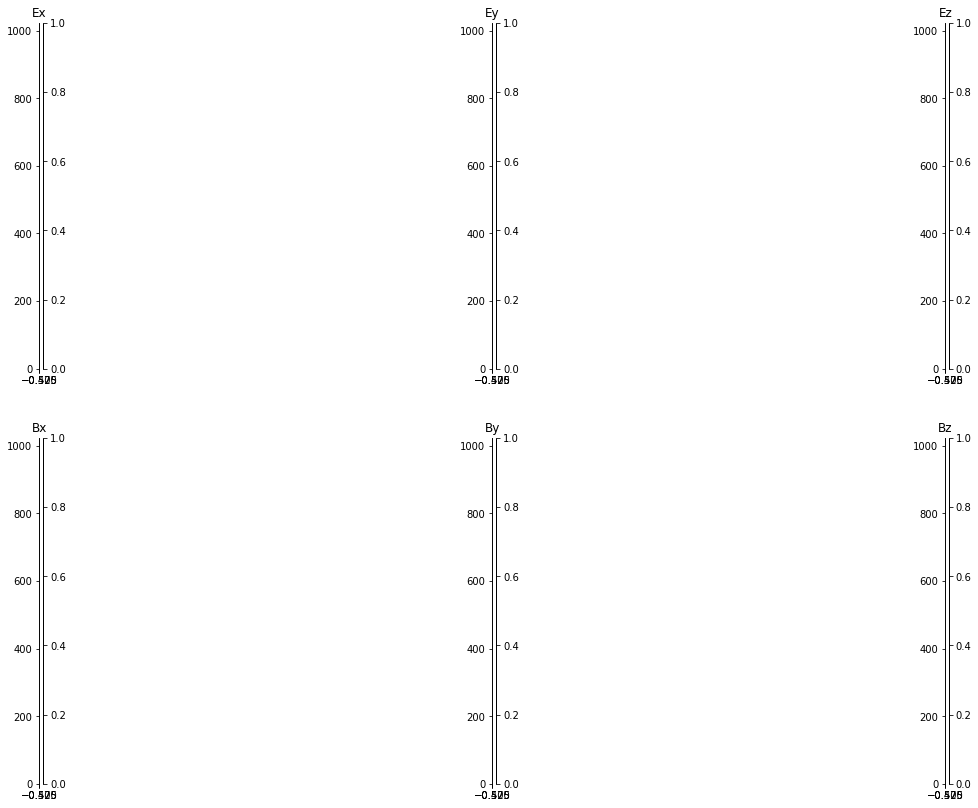

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

fig = plt.figure(figsize=(23,14))
axEx = fig.add_subplot(231); axEx.set_title('Ex'); 
axEy = fig.add_subplot(232); axEy.set_title('Ey');
axEz = fig.add_subplot(233); axEz.set_title('Ez');

Ex_ = axEx.imshow(Field[0], cmap = plt.get_cmap('plasma'), interpolation="gaussian", origin='lower')
Ey_ = axEy.imshow(Field[1], cmap = plt.get_cmap('plasma'), interpolation="gaussian", origin='lower')
Ez_ = axEz.imshow(Field[2], cmap = plt.get_cmap('plasma'), interpolation="gaussian", origin='lower')

fig.colorbar(Ex_, cax=make_axes_locatable(axEx).append_axes("right",size="4%",pad=0.05))
fig.colorbar(Ey_, cax=make_axes_locatable(axEy).append_axes("right",size="4%",pad=0.05))
fig.colorbar(Ez_, cax=make_axes_locatable(axEz).append_axes("right",size="4%",pad=0.05))


axBx = fig.add_subplot(234); axBx.set_title('Bx');
axBy = fig.add_subplot(235); axBy.set_title('By');
axBz = fig.add_subplot(236); axBz.set_title('Bz');

Bx_ = axBx.imshow(Field[3], cmap = plt.get_cmap('plasma'), interpolation="gaussian", origin='lower')
By_ = axBy.imshow(Field[4], cmap = plt.get_cmap('plasma'), interpolation="gaussian", origin='lower')
Bz_ = axBz.imshow(Field[5], cmap = plt.get_cmap('plasma'), interpolation="gaussian", origin='lower')

fig.colorbar(Bx_, cax=make_axes_locatable(axBx).append_axes("right",size="4%",pad=0.05))
fig.colorbar(By_, cax=make_axes_locatable(axBy).append_axes("right",size="4%",pad=0.05))
fig.colorbar(Bz_, cax=make_axes_locatable(axBz).append_axes("right",size="4%",pad=0.05))

plt.show()
#fig.savefig('periodic boundaries, 10 randomly spaced particle (at TIME=5000).png')